In [2]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import time

In [3]:
data = pd.read_csv("./AAP_data_Fawcett_etal.csv")

# describe the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2217e908>,
      dtype=object)

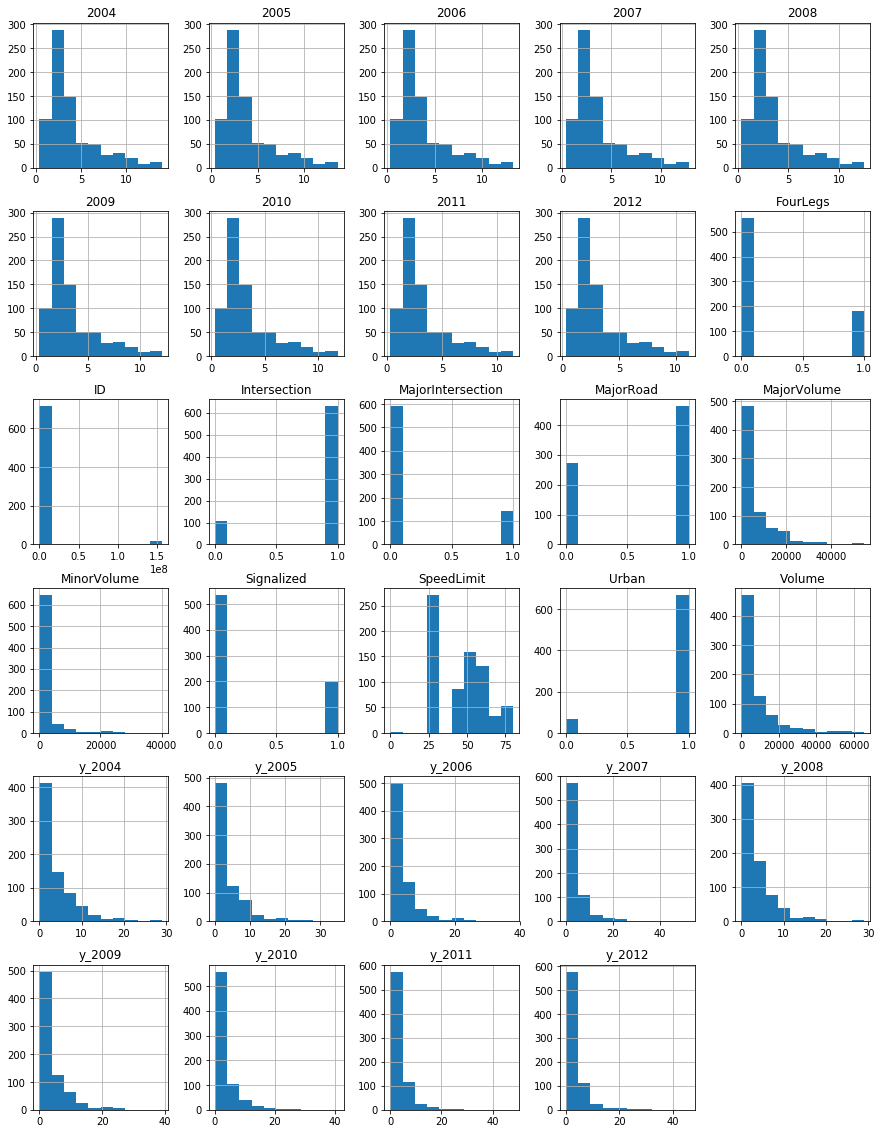

In [4]:
data.hist(figsize=(15,20))

In [5]:
data.columns

Index(['ID', 'y_2004', 'y_2005', 'y_2006', 'y_2007', 'y_2008', 'y_2009',
       'y_2010', 'y_2011', 'y_2012', 'Volume', 'MajorVolume', 'MinorVolume',
       'Urban', 'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
       'MajorIntersection', 'FourLegs', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012'],
      dtype='object')

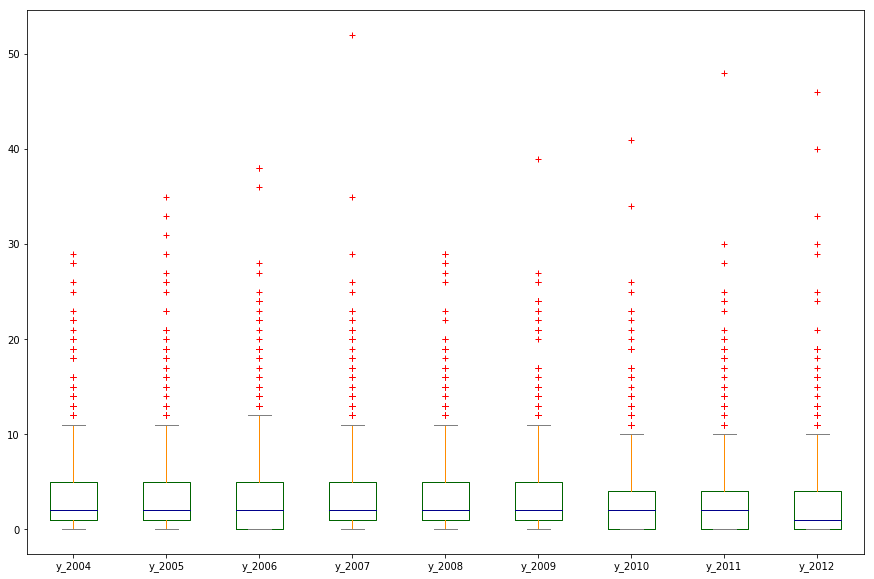

In [6]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}
data[['y_2004', 'y_2005', 'y_2006', 'y_2007', 'y_2008', 'y_2009',
       'y_2010', 'y_2011', 'y_2012']].plot.box(color=color, sym='r+',figsize=(15,10))
plt.show()

In [7]:
np.mean(data.loc[162,][['y_2004', 'y_2005', 'y_2006', 'y_2007', 'y_2008', 'y_2009',
       'y_2010', 'y_2011', 'y_2012']])
np.mean(data.loc[162,][['y_2004']])
np.mean(data.loc[162,][['y_2004', 'y_2005']])
np.mean(data.loc[162,][['y_2004', 'y_2005','y_2006']])

6.333333333333333

# create dataset for each time period

In [8]:
data_2004 = data[['y_2004','Volume', 'MajorVolume', 'MinorVolume','Urban', 'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad','MajorIntersection', 'FourLegs']]
data_2004["time_coeff"] = -7

data_2005 = data[['y_2005','Volume', 'MajorVolume', 'MinorVolume',
                       'Urban', 'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
                       'MajorIntersection', 'FourLegs']]
data_2005["time_coeff"] = -6

data_2006 = data[['y_2006','Volume', 'MajorVolume', 'MinorVolume',
                       'Urban', 'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
                       'MajorIntersection', 'FourLegs']]
data_2006["time_coeff"] = -5

data_2007 = data[['y_2007','Volume', 'MajorVolume', 'MinorVolume',
                       'Urban', 'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
                       'MajorIntersection', 'FourLegs']]
data_2007["time_coeff"] = -4

data_2008 = data[['y_2008','Volume', 'MajorVolume', 'MinorVolume',
                       'Urban', 'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
                       'MajorIntersection', 'FourLegs']]
data_2008["time_coeff"] = -3

data_2009 = data[['y_2009','Volume', 'MajorVolume', 'MinorVolume',
                       'Urban', 'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
                       'MajorIntersection', 'FourLegs']]
data_2009["time_coeff"] = -2

data_2010 = data[['y_2010','Volume', 'MajorVolume', 'MinorVolume',
                       'Urban', 'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
                       'MajorIntersection', 'FourLegs']]
data_2010["time_coeff"] = -1

data_2011 = data[['y_2011','Volume', 'MajorVolume', 'MinorVolume',
                       'Urban', 'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
                       'MajorIntersection', 'FourLegs']]
data_2011["time_coeff"] = 0

data_2012 = data[['y_2012','Volume', 'MajorVolume', 'MinorVolume',
                       'Urban', 'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
                       'MajorIntersection', 'FourLegs']]
data_2012["time_coeff"] = 1



/Users/gururaj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gururaj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/gururaj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [9]:
data_2004.columns = ['y', 'Volume', 'MajorVolume', 'MinorVolume', 'Urban',
       'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
       'MajorIntersection', 'FourLegs', 'time_coeff']
data_2005.columns = ['y', 'Volume', 'MajorVolume', 'MinorVolume', 'Urban',
       'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
       'MajorIntersection', 'FourLegs', 'time_coeff']
data_2006.columns = ['y', 'Volume', 'MajorVolume', 'MinorVolume', 'Urban',
       'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
       'MajorIntersection', 'FourLegs', 'time_coeff']
data_2007.columns = ['y', 'Volume', 'MajorVolume', 'MinorVolume', 'Urban',
       'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
       'MajorIntersection', 'FourLegs', 'time_coeff']
data_2008.columns = ['y', 'Volume', 'MajorVolume', 'MinorVolume', 'Urban',
       'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
       'MajorIntersection', 'FourLegs', 'time_coeff']
data_2009.columns = ['y', 'Volume', 'MajorVolume', 'MinorVolume', 'Urban',
       'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
       'MajorIntersection', 'FourLegs', 'time_coeff']
data_2010.columns = ['y', 'Volume', 'MajorVolume', 'MinorVolume', 'Urban',
       'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
       'MajorIntersection', 'FourLegs', 'time_coeff']
data_2011.columns = ['y', 'Volume', 'MajorVolume', 'MinorVolume', 'Urban',
       'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
       'MajorIntersection', 'FourLegs', 'time_coeff']
data_2012.columns = ['y', 'Volume', 'MajorVolume', 'MinorVolume', 'Urban',
       'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
       'MajorIntersection', 'FourLegs', 'time_coeff']

In [10]:
data_2005.head()

,y,Volume,MajorVolume,MinorVolume,Urban,Intersection,Signalized,SpeedLimit,MajorRoad,MajorIntersection,FourLegs,time_coeff
0,10,55280,54919.43,360.98,1,1,1,60,1,0,0,-6
1,6,638,637.94,0.00,1,0,0,50,1,0,0,-6
2,7,1658,1103.58,554.75,1,1,1,45,1,1,0,-6
3,11,751,335.25,415.62,1,1,0,45,1,0,0,-6
4,0,2366,2364.20,1.33,1,1,0,30,0,0,0,-6


# Time series plots of accidents at sites 163, 309, 677 and 706

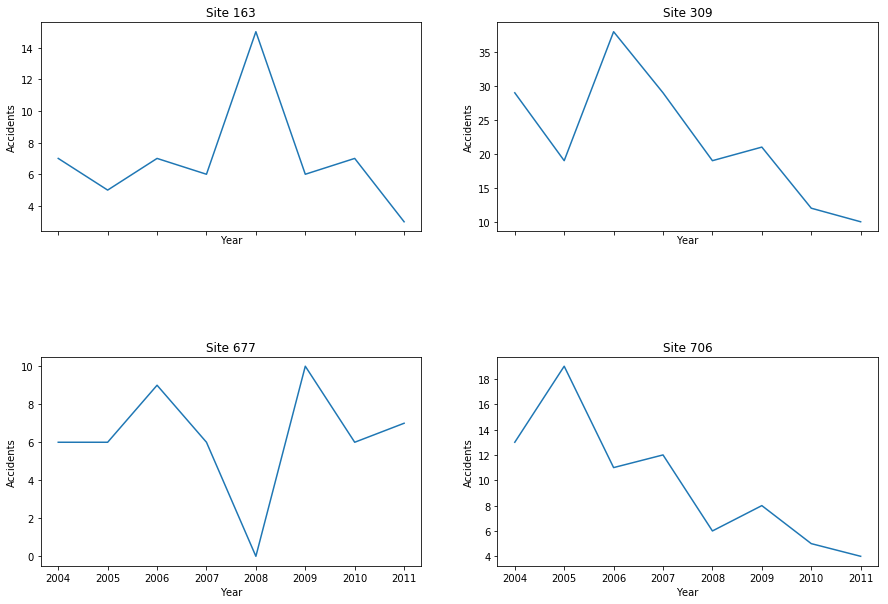

In [11]:
x_axis = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
actual_values_163 = data.loc[162,][1:9]
actual_values_309 = data.loc[308,][1:9]
actual_values_677 = data.loc[676,][1:9]
actual_values_706 = data.loc[705,][1:9]

f, figures = plt.subplots(2,2, sharex=True,figsize=(15,10))
x_axis = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
figures[0][0].set_title("Site 163")
figures[0][0].plot(x_axis, actual_values_163)
figures[0][0].set_xlabel("Year")
figures[0][0].set_ylabel("Accidents")

figures[0][1].set_title("Site 309")
figures[0][1].plot(x_axis, actual_values_309)
figures[0][1].set_xlabel("Year")
figures[0][1].set_ylabel("Accidents")


figures[1][0].set_title("Site 677")
figures[1][0].plot(x_axis, actual_values_677)
figures[1][0].set_xlabel("Year")
figures[1][0].set_ylabel("Accidents")

figures[1][1].set_title("Site 706")
figures[1][1].plot(x_axis, actual_values_706)
figures[1][1].set_xlabel("Year")
figures[1][1].set_ylabel("Accidents")

f.subplots_adjust(hspace=0.6)

plt.show()

# Data preparation to model Global APM

In [12]:
data_horizontal = pd.concat([data_2004, data_2005, data_2006, data_2007, data_2008, data_2009, data_2010, data_2011, data_2012], axis=0)

In [13]:
len(data_horizontal)

6606

# Global APM Model

In [15]:
#n_iterations = 100
n_iterations = 100
formula = 'y ~ time_coeff + Volume + MajorVolume + MinorVolume + Urban + \
Intersection + Signalized + SpeedLimit + MajorRoad + MajorIntersection + FourLegs'
    
mu_model_all = pm.Model()
with mu_model_all:
    
    pm.glm.GLM.from_formula(formula=formula, data=data_horizontal, family=pm.glm.families.NegativeBinomial())
    
    trace_a11 = pm.sample(n_iterations, tune=80, init='adapt_diag')

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, mu, FourLegs, MajorIntersection, MajorRoad, SpeedLimit, Signalized, Intersection, Urban, MinorVolume, MajorVolume, Volume, time_coeff, Intercept]
Sampling 2 chains: 100%|██████████| 360/360 [04:03<00:00,  1.37s/draws]
The acceptance probability does not match the target. It is 0.9139331892621636, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9465050215590443, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number o

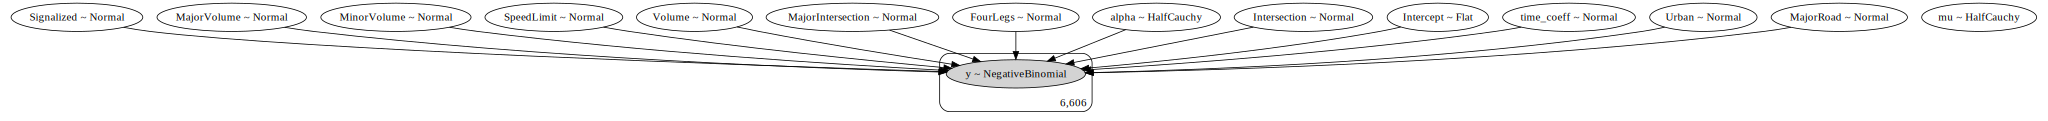

In [16]:
pm.model_to_graphviz(mu_model_all)

In [105]:
image = pm.model_to_graphviz(mu_model_all)

In [106]:
from PIL import Image
image.save(directory="./mu_model.png")

'./mu_model.png/Digraph.gv'

In [107]:
pm.summary(trace_a11)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,0.001941,0.003950,0.000394,-0.003681,0.008237,1.327067,2.369456
time_coeff,-0.010954,0.005197,0.000519,-0.019581,-0.002221,3.729920,1.212004
Volume,0.000272,0.001595,0.000159,-0.002557,0.003508,6.087677,1.085592
MajorVolume,-0.000260,0.001595,0.000159,-0.003501,0.002567,6.089229,1.085508
MinorVolume,-0.000242,0.001595,0.000159,-0.003475,0.002585,6.085501,1.085840
Urban,0.002541,0.003367,0.000336,-0.002552,0.010837,2.759781,1.454688
Intersection,0.003620,0.001960,0.000195,0.000469,0.007384,4.673053,1.144632
Signalized,0.003979,0.004446,0.000444,-0.001087,0.011925,2.645949,1.520237
SpeedLimit,0.020956,0.000663,0.000063,0.019594,0.022086,6.787380,1.076464
MajorRoad,0.002279,0.001728,0.000171,-0.001018,0.005245,5.782588,1.096227


In [17]:
mu_all_dataframe = pm.summary(trace_a11)

In [18]:
mu_all_dataframe["mean"].keys()

Index(['Intercept', 'time_coeff', 'Volume', 'MajorVolume', 'MinorVolume',
       'Urban', 'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
       'MajorIntersection', 'FourLegs', 'mu', 'alpha'],
      dtype='object')

## Global APM predictions

In [19]:
%%time

mu_j = pd.DataFrame()
mu_j[0] = np.full((1,len(data)), 0)[0]
mu_j[1] = np.full((1,len(data)), 0)[0]
mu_j[2] = np.full((1,len(data)), 0)[0]
mu_j[3] = np.full((1,len(data)), 0)[0]
mu_j[4] = np.full((1,len(data)), 0)[0]
mu_j[5] = np.full((1,len(data)), 0)[0]
mu_j[6] = np.full((1,len(data)), 0)[0]
mu_j[7] = np.full((1,len(data)), 0)[0]
mu_j[8] = np.full((1,len(data)), 0)[0]

mu_j.columns = ["2004","2005","2006","2007","2008","2009","2010","2011","2012"]

i = 0

current_time = mu_all_dataframe["mean"]

for row in data.iterrows():
    
    
    for j in range(4,13):
        
        ind = j - 4
        
        time = ind - 7
        
        column = 2000 + j
    
        value = np.exp(current_time[0] + current_time[1] * -1 * time
                                     + current_time[2] * row[1][10] + current_time[3] * row[1][11] +
                                     current_time[4] * row[1][12] + current_time[5] * row[1][13] + 
                                     current_time[6] * row[1][14] + current_time[7] * row[1][15] + 
                                      current_time[8] * row[1][16] + current_time[9] * row[1][17] +
                                     current_time[10] * row[1][18] + current_time[11] * row[1][19])
        
        mu_j.loc[i,str(column)] = value

    i = i + 1
    
print("Done")

Done
CPU times: user 3.32 s, sys: 32.5 ms, total: 3.36 s
Wall time: 3.41 s


mu_j.head()

In [20]:
mu_j.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,6.446556,6.517677,6.589583,6.662281,6.735782,6.810094,6.885226,6.961186,7.037984
1,2.677300,2.706837,2.736700,2.766892,2.797418,2.828280,2.859483,2.891029,2.922924
2,2.485215,2.512633,2.540353,2.568380,2.596715,2.625363,2.654327,2.683611,2.713217
3,2.441497,2.468433,2.495666,2.523199,2.551036,2.579180,2.607634,2.636403,2.665488
4,1.804633,1.824542,1.844671,1.865022,1.885598,1.906401,1.927433,1.948697,1.970196


# Bayesian Hierachical Model

# Load the Model

In [24]:
import theano.tensor as tt

modelMultAj = pm.Model()

with modelMultAj:
    
    tau = pm.Gamma("tau", 2,20)
   
    aj = pm.Gamma("aj_before", 4, 4)
        
    bn = pm.Normal("bn_before",0,0.1)

    bz = pm.Bernoulli("bz", 0.5)
    
    bn_array =  bn.random(size=734)
    
    bz_array = bn.random(size=734)
    
    bj_array = pm.Deterministic("bj", tt.mul(bn_array,bz_array))
    
    aj_array = pm.Deterministic("aj", tt.mul(1, aj.random(size=734)))
    
    disp_param = 1
    
    models = []
    
    t = -7

    for time_range in range(2004, 2011):
        
        mu_j_t = mu_j[str(time_range)]
                
        aj_mj = pm.Deterministic("aj_mj_{}".format(time_range), tt.mul(aj_array,mu_j_t))
        
        lamda_aj_mj = pm.Deterministic("lamda_{}".format(time_range), tt.mul(aj_mj, tt.exp(tt.mul(t,bj_array))))
        
        lamda_final = pm.Deterministic("lamda_before_{}".format(time_range), (lamda_aj_mj) / ((np.exp(-1 * t * tau)) - 1))
        
        observed = data["y_{}".format(time_range)]

        current_model = pm.NegativeBinomial("before_time_{}".format(time_range), mu = lamda_final, alpha = 1/(np.exp(-1 * t * tau)), observed = observed)

        models.append(current_model)

        t = t + 1

    t = 0

    for time_range in range(2011, 2013):

        mu_j_t = mu_j[str(time_range)]
    
        aj_mj = pm.Deterministic("aj_mj_{}".format(time_range), tt.mul(aj_array,mu_j_t))
        
        lamda_aj_mj = pm.Deterministic("lamda_after_{}".format(time_range), tt.mul(aj_mj, tt.exp(tt.mul(t,bj_array))))
        
        observed = data["y_{}".format(time_range)].values

        current_model = pm.Poisson("after_time_{}".format(time_range), mu = lamda_aj_mj, observed = observed)

        models.append(current_model)

        t = t + 1

#trace_final = pm.load_trace(directory="./final_trace/", model=modelMultAj)

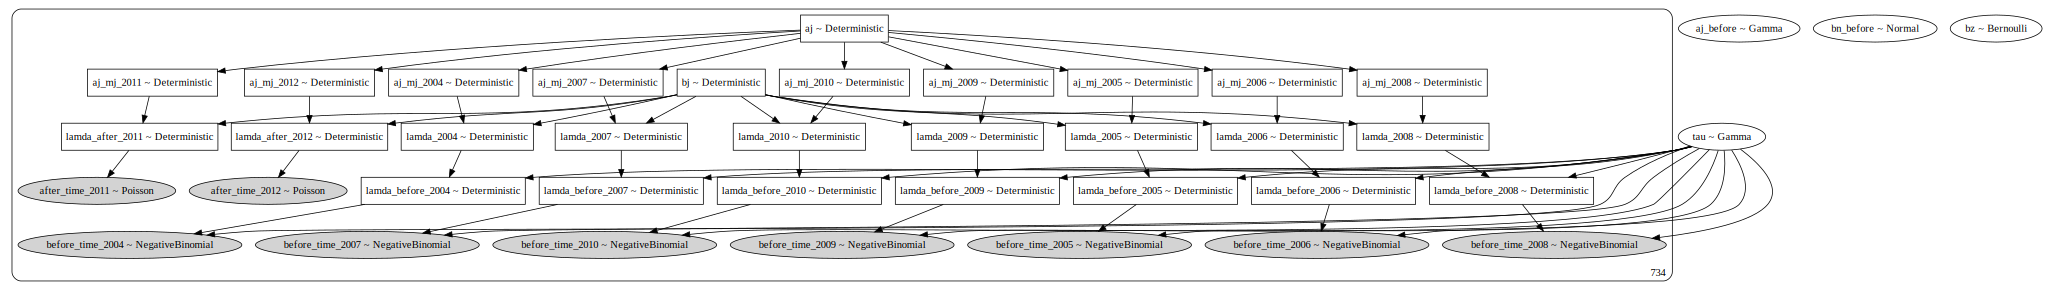

In [25]:
pm.model_to_graphviz(modelMultAj)

In [21]:
#pm.summary(trace_final)

# Train the Model with RTM and Trend parameters for each site

In [24]:
%%time

n_samples = 1000

import theano.tensor as tt

modelMultAj = pm.Model()

with modelMultAj:
    
    tau = pm.Gamma("tau", 2,20)
   
    aj = pm.Gamma("aj_before", 4, 4)
        
    bn = pm.Normal("bn_before",0,0.1)

    bz = pm.Bernoulli("bz", 0.5)
    
    bn_array =  bn.random(size=734)
    
    bz_array = bn.random(size=734)
    
    bj_array = pm.Deterministic("bj", tt.mul(bn_array,bz_array))
    
    aj_array = pm.Deterministic("aj", tt.mul(1, aj.random(size=734)))
    
    disp_param = 1
    
    models = []
    
    t = -7

    for time_range in range(2004, 2011):
        
        mu_j_t = mu_j[str(time_range)]
                
        aj_mj = pm.Deterministic("aj_mj_{}".format(time_range), tt.mul(aj_array,mu_j_t))
        
        lamda_aj_mj = pm.Deterministic("lamda_{}".format(time_range), 
                                       tt.mul(aj_mj, tt.exp(tt.mul(t,bj_array))))
        
        lamda_final = pm.Deterministic("lamda_before_{}".format(time_range), 
                                       (lamda_aj_mj) / ((np.exp(-1 * t * tau)) - 1))
        
        observed = data["y_{}".format(time_range)]

        current_model = pm.NegativeBinomial("before_time_{}".format(time_range), mu = lamda_final, 
                                            alpha = 1/(np.exp(-1 * t * tau)), 
                                            observed = observed)

        models.append(current_model)

        t = t + 1

    t = 0

    for time_range in range(2011, 2013):

        mu_j_t = mu_j[str(time_range)]
    
        aj_mj = pm.Deterministic("aj_mj_{}".format(time_range), tt.mul(aj_array,mu_j_t))
        
        lamda_aj_mj = pm.Deterministic("lamda_after_{}".format(time_range), 
                                       tt.mul(aj_mj, tt.exp(tt.mul(t,bj_array))))
        
        observed = data["y_{}".format(time_range)].values

        current_model = pm.Poisson("after_time_{}".format(time_range), 
                                   mu = lamda_aj_mj, observed = observed)

        models.append(current_model)

        t = t + 1
    
    trace_final_model_before_and_after = pm.sample(n_samples, tune=10, init='adapt_diag')
    
print("DONE MODELING!!!!!!!!!!")
#pm.save_trace(trace_final_model_before_and_after, "./final_trace/", overwrite=True)
pm.model_to_graphviz(modelMultAj)

INFO (theano.gof.compilelock): Refreshing lock /Users/gururaj/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.6.5-64/lock_dir/lock
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [bn_before, aj_before, tau]
>BinaryGibbsMetropolis: [bz]
Sampling 2 chains: 100%|██████████| 2020/2020 [02:09<00:00, 15.58draws/s]
The acceptance probability does not match the target. It is 0.9755523597937512, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9810718474824797, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


DONE MODELING!!!!!!!!!!
CPU times: user 28.1 s, sys: 2.46 s, total: 30.5 s
Wall time: 2min 54s


In [25]:
%%time
posterior_summary = pm.summary(trace_final_model_before_and_after)

CPU times: user 2min 16s, sys: 1.28 s, total: 2min 17s
Wall time: 2min 19s


In [26]:
modelMultAj.basic_RVs

[tau_log__,
 aj_before_log__,
 bn_before,
 bz,
 before_time_2004,
 before_time_2005,
 before_time_2006,
 before_time_2007,
 before_time_2008,
 before_time_2009,
 before_time_2010,
 after_time_2011,
 after_time_2012]

In [27]:
posterior_summary["mean"]["aj__676"]

1.8961214379338371

# Predictions for site accidents given any time

In [28]:
def get_mu_for_site(time, site):
    
    model_learnt_coeff = mu_all_dataframe["mean"]
    
    accident_mean_predicted = model_learnt_coeff["Intercept"] + time * model_learnt_coeff["time_coeff"] + \
                            model_learnt_coeff["Volume"] * site[0] + model_learnt_coeff["MajorVolume"] * site[1] + \
                            model_learnt_coeff["MinorVolume"] * site[2] + model_learnt_coeff["Urban"] * site[3] + \
                            model_learnt_coeff["Intersection"] * site[4] + model_learnt_coeff["Signalized"] * site[5] + \
                            model_learnt_coeff["SpeedLimit"] * site[6] + model_learnt_coeff["MajorRoad"] * site[7] + \
                            model_learnt_coeff["MajorIntersection"] * site[8] + model_learnt_coeff["FourLegs"] * site[9]
                        
    return np.exp(accident_mean_predicted)

In [29]:
def get_accidents(time, site, index):
    
    RTM = posterior_summary["mean"]["aj__{}".format(index - 1)]
    
    local_trend = posterior_summary["mean"]["bj__{}".format(index - 1)]
    
    mean_accident = get_mu_for_site(time, site)
    
    accident = RTM * mean_accident * np.exp(time * local_trend)
    
    return accident

def get_accidents_min_sd(time, site, index):
    
    RTM = posterior_summary["mean"]["aj__{}".format(index - 1)] - posterior_summary["sd"]["aj__{}".
                                                                                          format(index - 1)]
    
    local_trend = posterior_summary["mean"]["bj__{}".format(index - 1)] - posterior_summary["sd"]["bj__{}".
                                                                                                  format(index - 1)]
    
    mean_accident = get_mu_for_site(time, site)
    
    accident = RTM * mean_accident * np.exp(time * local_trend)
    
    return accident


def get_accidents_max_sd(time, site, index):
    
    RTM = posterior_summary["mean"]["aj__{}".format(index - 1)] + posterior_summary["sd"]["aj__{}".
                                                                                          format(index - 1)]
    
    local_trend = posterior_summary["mean"]["bj__{}".format(index - 1)] + posterior_summary["sd"]["bj__{}".
                                                                                                  format(index - 1)]
    
    mean_accident = get_mu_for_site(time, site)
    
    accident = RTM * mean_accident * np.exp(time * local_trend)
    
    return accident


In [30]:
site = data.loc[162,['Volume', 'MajorVolume', 'MinorVolume',
       'Urban', 'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
       'MajorIntersection', 'FourLegs']].values

# Prediction for 2012 for site using the model

In [32]:
prediction = get_accidents(-1, site, 2)

# Graphs of the Paper

In [33]:
site_163 = data.loc[162,["y_2008","y_2011",'Volume', 'MajorVolume', 'MinorVolume',
       'Urban', 'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
       'MajorIntersection', 'FourLegs']].values
site_309 = data.loc[308,["y_2008","y_2011",'Volume', 'MajorVolume', 'MinorVolume',
       'Urban', 'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
       'MajorIntersection', 'FourLegs']].values
site_677 = data.loc[676,["y_2008","y_2011",'Volume', 'MajorVolume', 'MinorVolume',
       'Urban', 'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
       'MajorIntersection', 'FourLegs']].values
site_706 = data.loc[705,["y_2008","y_2011",'Volume', 'MajorVolume', 'MinorVolume',
       'Urban', 'Intersection', 'Signalized', 'SpeedLimit', 'MajorRoad',
       'MajorIntersection', 'FourLegs']].values

In [34]:
output_dataframe = pd.DataFrame()

## site_163 calculations

In [35]:
index = 163
site_id = index - 1
aj = posterior_summary["mean"]["aj__{}".format(site_id)]
bj = posterior_summary["mean"]["bj__{}".format(site_id)]
observed_2008 = site_163[0]
mj_2008 = mu_j["2008"][site_id]
time = -3
lamda_2008 = get_accidents(time=time, site=site_163[2:],index=index)

observed_2011 = site_163[1]
mj_2011 = mu_j["2011"][site_id]
time = 0
lamda_2011 = get_accidents(time=time, site=site_163[2:],index=index)

prediction_2012 = get_accidents(time=1, site=site_163[2:], index=index)

output_dataframe = output_dataframe.append([[site_id, aj, bj, observed_2008, mj_2008, lamda_2008, mj_2011, observed_2011, lamda_2011,prediction_2012]])

# site 309 calculations

In [36]:
index = 309
site_id = index - 1
aj = posterior_summary["mean"]["aj__{}".format(site_id)]
bj = posterior_summary["mean"]["bj__{}".format(site_id)]
observed_2008 = site_309[0]
mj_2008 = mu_j["2008"][site_id]
time = -3
lamda_2008 = get_accidents(time=time, site=site_309[2:],index=index)

observed_2011 = site_309[1]
mj_2011 = mu_j["2011"][site_id]
time = 0
lamda_2011 = get_accidents(time=time, site=site_309[2:],index=index)
prediction_2012 = get_accidents(time=1, site=site_309[2:], index=index)


output_dataframe = output_dataframe.append([[site_id, aj, bj, observed_2008, mj_2008, lamda_2008, mj_2011, observed_2011, lamda_2011, prediction_2012]])

# site 677 Calculations

In [37]:
index = 677
site_id = index - 1
aj = posterior_summary["mean"]["aj__{}".format(site_id)]
bj = posterior_summary["mean"]["bj__{}".format(site_id)]
observed_2008 = site_677[0]
mj_2008 = mu_j["2008"][site_id]
time = -3
lamda_2008 = get_accidents(time=time, site=site_677[2:],index=index)

observed_2011 = site_677[1]
mj_2011 = mu_j["2011"][site_id]
time = 0
lamda_2011 = get_accidents(time=time, site=site_677[2:],index=index)
prediction_2012 = get_accidents(time=1, site=site_677[2:], index=index)

output_dataframe = output_dataframe.append([[site_id, aj, bj, observed_2008, mj_2008, lamda_2008, mj_2011, observed_2011, lamda_2011, prediction_2012]])

# site 706 Calculations

In [38]:
index = 706
site_id = index - 1
aj = posterior_summary["mean"]["aj__{}".format(site_id)]
bj = posterior_summary["mean"]["bj__{}".format(site_id)]
observed_2008 = site_706[0]
mj_2008 = mu_j["2008"][site_id]
time = -3
lamda_2008 = get_accidents(time=time, site=site_706[2:],index=index)

observed_2011 = site_706[1]
mj_2011 = mu_j["2011"][site_id]
time = 0
lamda_2011 = get_accidents(time=time, site=site_706[2:],index=index)

prediction_2012 = get_accidents(time=1, site=site_706[2:], index=index)

output_dataframe = output_dataframe.append([[site_id, aj, bj, observed_2008, mj_2008, lamda_2008, mj_2011, observed_2011, lamda_2011, prediction_2012]])

In [39]:
output_dataframe.columns = ["site_id","aj","bj","observed_2008","mj_2008","lamda_2008","mj_2011","observed_2011", "lamda_2011", "prediction_2012"]

# MCMC Predictive Summary

In [40]:
output_dataframe

,site_id,aj,bj,observed_2008,mj_2008,lamda_2008,mj_2011,observed_2011,lamda_2011,prediction_2012
0,162,1.151514,-0.008194,15.0,3.564976,4.493571,3.684273,3.0,4.242491,4.161955
0,308,1.080403,-0.005515,19.0,4.757240,5.581058,4.916435,10.0,5.311730,5.224873
0,676,1.896121,0.000406,0.0,2.497999,5.052653,2.581591,7.0,4.895011,4.843564
0,705,0.310386,0.007189,6.0,4.551011,1.476500,4.703305,4.0,1.459839,1.454328


In [41]:
features = data.iloc[162,10:20].values

In [42]:
features

array([3.11100e+03, 3.11064e+03, 0.00000e+00, 1.00000e+00, 1.00000e+00,
       0.00000e+00, 6.00000e+01, 1.00000e+00, 0.00000e+00, 0.00000e+00])

In [43]:
get_mu_for_site(-4, features)

3.849568748288983

# Site 163 Accident Predictions Graph

In [44]:
index = 163
site_163 = data.loc[162,]
features = site_163[10:20].values
actual_values_163 = site_163[1:9]

mu_site_163 = []

for i in range(0,8):
    time = i - 7
    
    print("Mu")
    print(get_mu_for_site(time, features))
    
    mu_site_163.append(get_mu_for_site(time, features))

predictions_163 = []
predictions_163_min = []
predictions_163_max = []
for i in range(0,8):
    time = i - 7
    predictions_163.append(get_accidents(time=time, site=features,index=index))
    predictions_163_min.append(get_accidents_min_sd(time=time, site=features,index=index))
    predictions_163_max.append(get_accidents_max_sd(time=time, site=features,index=index))
    

index = 309
site_163 = data.loc[index-1,]
features = site_163[10:20].values
actual_values_309 = site_163[1:9]

mu_site_309 = []

for i in range(0,8):
    time = i - 7
    mu_site_309.append(get_mu_for_site(time, features))

predictions_309 = []
predictions_309_min = []
predictions_309_max = []
for i in range(0,8):
    time = i - 7
    predictions_309.append(get_accidents(time=time, site=features,index=index))
    predictions_309_min.append(get_accidents_min_sd(time=time, site=features,index=index))
    predictions_309_max.append(get_accidents_max_sd(time=time, site=features,index=index))
    
index = 677
site_163 = data.loc[index-1,]
features = site_163[10:20].values
actual_values_677 = site_163[1:9]

mu_site_677 = []

for i in range(0,8):
    time = i - 7
    mu_site_677.append(get_mu_for_site(time, features))

predictions_677 = []
predictions_677_min = []
predictions_677_max = []
for i in range(0,8):
    time = i - 7
    predictions_677.append(get_accidents(time=time, site=features,index=index))
    predictions_677_min.append(get_accidents_min_sd(time=time, site=features,index=index))
    predictions_677_max.append(get_accidents_max_sd(time=time, site=features,index=index))

     
index = 706
site_163 = data.loc[index-1,]
features = site_163[10:20].values
actual_values_706 = site_163[1:9]

mu_site_706 = []

for i in range(0,8):
    time = i - 7
    mu_site_706.append(get_mu_for_site(time, features))

predictions_706 = []
predictions_706_min = []
predictions_706_max = []
for i in range(0,8):
    time = i - 7
    predictions_706.append(get_accidents(time=time, site=features,index=index))
    predictions_706_min.append(get_accidents_min_sd(time=time, site=features,index=index))
    predictions_706_max.append(get_accidents_max_sd(time=time, site=features,index=index))


Mu
3.978389300102908
Mu
3.934977125676195
Mu
3.892038664791897
Mu
3.849568748288983
Mu
3.8075622634122968
Mu
3.7660141531970526
Mu
3.724919415860054
Mu
3.6842731041975467


In [45]:
features = site_163[10:20].values
features

array([1.939600e+04, 1.732566e+04, 2.070220e+03, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 6.000000e+01, 1.000000e+00,
       0.000000e+00, 1.000000e+00])

In [46]:
get_mu_for_site(-7, features)

5.078770418336666

In [47]:
data.iloc[162,10:20]

Volume               3111.00
MajorVolume          3110.64
MinorVolume             0.00
Urban                   1.00
Intersection            1.00
Signalized              0.00
SpeedLimit             60.00
MajorRoad               1.00
MajorIntersection       0.00
FourLegs                0.00
Name: 162, dtype: float64

In [48]:
site_163

ID                   1.000066e+07
y_2004               1.300000e+01
y_2005               1.900000e+01
y_2006               1.100000e+01
y_2007               1.200000e+01
y_2008               6.000000e+00
y_2009               8.000000e+00
y_2010               5.000000e+00
y_2011               4.000000e+00
y_2012               6.000000e+00
Volume               1.939600e+04
MajorVolume          1.732566e+04
MinorVolume          2.070220e+03
Urban                1.000000e+00
Intersection         1.000000e+00
Signalized           1.000000e+00
SpeedLimit           6.000000e+01
MajorRoad            1.000000e+00
MajorIntersection    0.000000e+00
FourLegs             1.000000e+00
2004                 8.875844e+00
2005                 8.627497e+00
2006                 8.386099e+00
2007                 8.151455e+00
2008                 7.923376e+00
2009                 7.701680e+00
2010                 7.486186e+00
2011                 7.276722e+00
2012                 7.073118e+00
Name: 705, dty

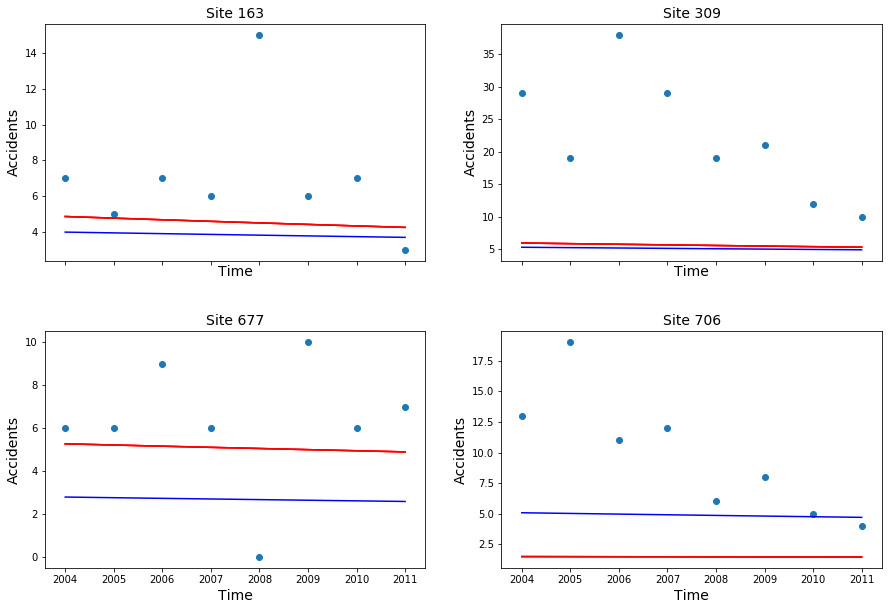

In [62]:
f, figures = plt.subplots(2,2, sharex=True,figsize=(15,10))
x_axis = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
figures[0][0].set_title("Site 163", fontsize=14)
figures[0][0].scatter(x_axis, actual_values_163)
figures[0][0].plot(x_axis, mu_site_163, color="blue")
figures[0][0].plot(x_axis, predictions_163,color="red")
figures[0][0].plot(x_axis, predictions_163_min,color="red")
figures[0][0].plot(x_axis, predictions_163_max,color="red")
figures[0][0].set_xlabel("Time", fontsize=14)
figures[0][0].set_ylabel("Accidents",fontsize=14)

figures[0][1].set_title("Site 309",fontsize=14)
figures[0][1].scatter(x_axis, actual_values_309)
figures[0][1].plot(x_axis, mu_site_309, color="blue")
figures[0][1].plot(x_axis, predictions_309,color="red")
figures[0][1].plot(x_axis, predictions_309_min,color="red")
figures[0][1].plot(x_axis, predictions_309_max,color="red")
figures[0][1].set_xlabel("Time", fontsize=14)
figures[0][1].set_ylabel("Accidents", fontsize=14)


figures[1][0].set_title("Site 677", fontsize=14)
figures[1][0].scatter(x_axis, actual_values_677)
figures[1][0].plot(x_axis, mu_site_677, color="blue")
figures[1][0].plot(x_axis, predictions_677,color="red")
figures[1][0].plot(x_axis, predictions_677_min,color="red")
figures[1][0].plot(x_axis, predictions_677_max,color="red")
figures[1][0].set_xlabel("Time", fontsize=14)
figures[1][0].set_ylabel("Accidents", fontsize=14)

figures[1][1].set_title("Site 706", fontsize=14)
figures[1][1].scatter(x_axis, actual_values_706)
figures[1][1].plot(x_axis, mu_site_706, color="blue")
figures[1][1].plot(x_axis, predictions_706,color="red")
figures[1][1].plot(x_axis, predictions_706_min,color="red")
figures[1][1].plot(x_axis, predictions_706_max,color="red")
figures[1][1].set_xlabel("Time", fontsize=14)
figures[1][1].set_ylabel("Accidents", fontsize=14)

f.subplots_adjust(hspace=0.3)
plt.show()

# Full Posterior Predictive Densities for sites in 2012

In [66]:
posterior_predictions = pm.sample_posterior_predictive(trace_final_model_before_and_after, samples=1000, model=modelMultAj)

100%|██████████| 1000/1000 [00:09<00:00, 107.76it/s]


In [75]:
def get_posterior_for_2012(site):
    site = site
    posterior_site = []
    for i in range(len(posterior_predictions["after_time_2012"])):
        posterior_site.append(posterior_predictions["after_time_2012"][i][site])
        
    return posterior_site

In [76]:
from scipy.stats import poisson

posterior_site_163 = get_posterior_for_2012(163)
posterior_site_309 = get_posterior_for_2012(309)
posterior_site_677 = get_posterior_for_2012(677)
posterior_site_706 = get_posterior_for_2012(706)


mean_163 = posterior_summary["mean"]["lamda_after_2012__162"]
mean_309 = posterior_summary["mean"]["lamda_after_2012__308"]
mean_677 = posterior_summary["mean"]["lamda_after_2012__676"]
mean_706 = posterior_summary["mean"]["lamda_after_2012__705"]

predictive_prob_163 = poisson.cdf(posterior_site_163, mean_163)
predictive_prob_309 = poisson.cdf(posterior_site_309, mean_309)
predictive_prob_677 = poisson.cdf(posterior_site_677, mean_677)
predictive_prob_706 = poisson.cdf(posterior_site_706, mean_706)


# Predictive Probability

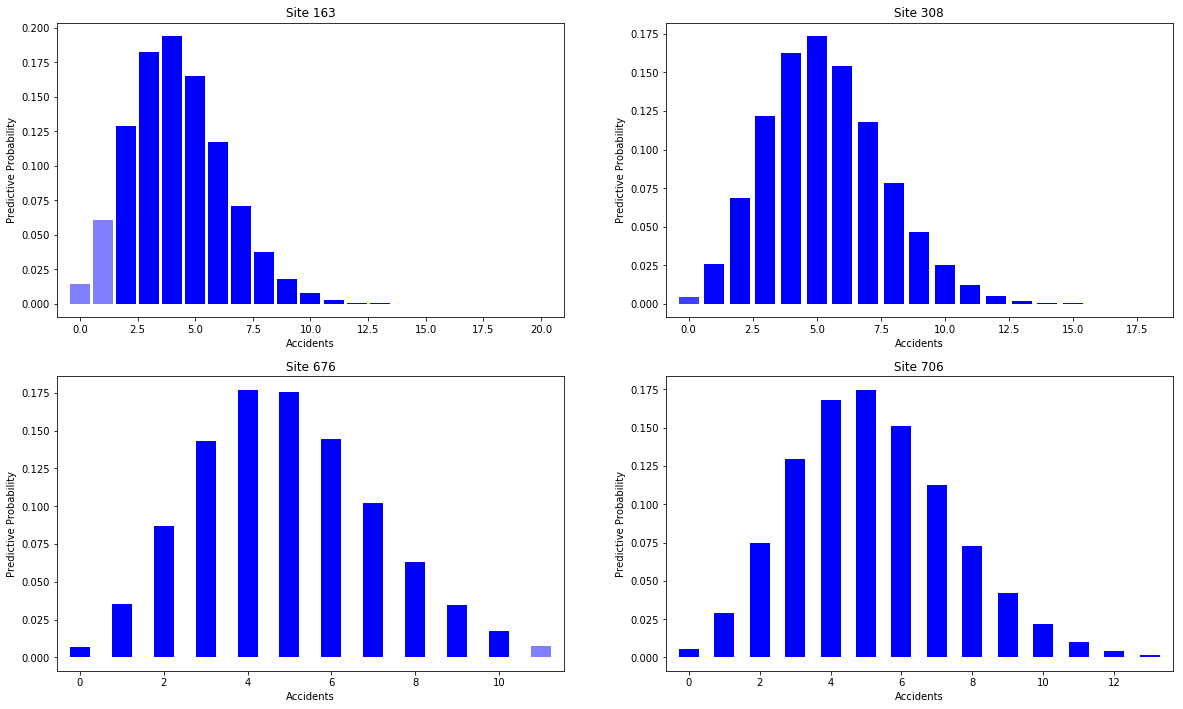

In [77]:
from scipy import stats
ppf_163 = poisson.pmf(posterior_site_163, posterior_summary["mean"]["lamda_after_2012__162"])
ppf_309 = poisson.pmf(posterior_site_309, posterior_summary["mean"]["lamda_after_2012__308"])
ppf_677 = poisson.pmf(posterior_site_677, posterior_summary["mean"]["lamda_after_2012__676"])
ppf_706 = poisson.pmf(posterior_site_706, posterior_summary["mean"]["lamda_after_2012__706"])

bin_width = 20

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0][0].vlines(posterior_site_163, 0, ppf_163, colors='b', lw=bin_width, alpha=0.5)
ax[0][0].set_title("Site 163")
ax[0][0].set_xlabel("Accidents")
ax[0][0].set_ylabel("Predictive Probability")

ax[0][1].vlines(posterior_site_309, 0, ppf_309, colors='b', lw=bin_width, alpha=0.5)
ax[0][1].set_title("Site 308")
ax[0][1].set_xlabel("Accidents")
ax[0][1].set_ylabel("Predictive Probability")

ax[1][0].vlines(posterior_site_677, 0, ppf_677, colors='b', lw=bin_width, alpha=0.5)
ax[1][0].set_title("Site 676")
ax[1][0].set_xlabel("Accidents")
ax[1][0].set_ylabel("Predictive Probability")

ax[1][1].vlines(posterior_site_706, 0, ppf_706, colors='b', lw=bin_width, alpha=0.5)
ax[1][1].set_title("Site 706")
ax[1][1].set_xlabel("Accidents")
ax[1][1].set_ylabel("Predictive Probability")

plt.subplots_adjust(bottom=0.40, top=1.3)
plt.show()

# Excedance Probability of Predictions

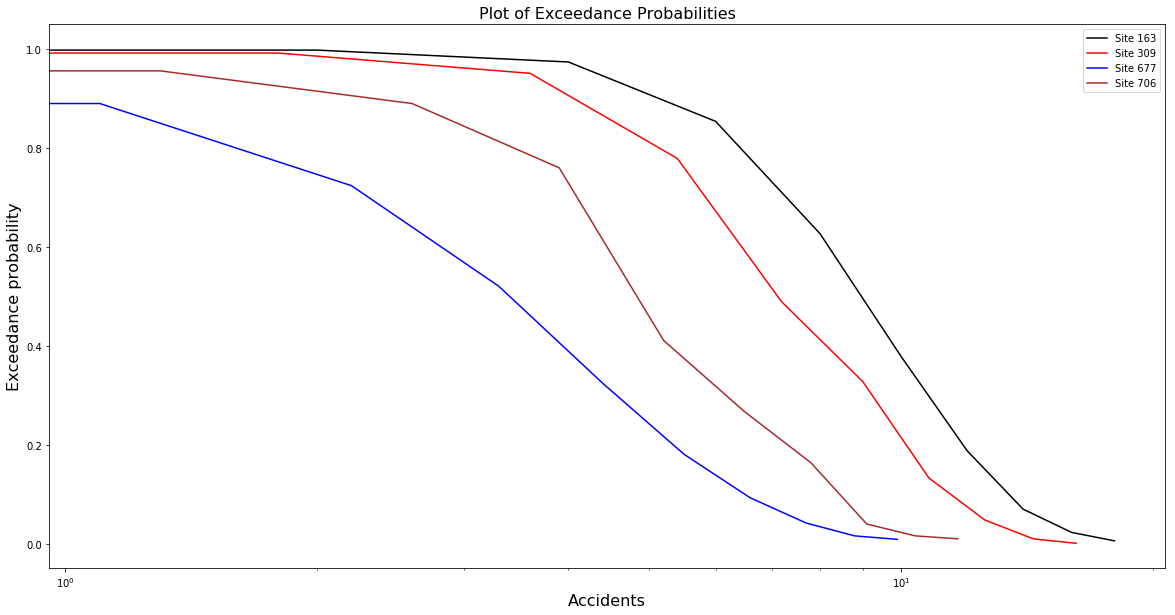

In [73]:
plt.figure(figsize=(20,10))


results_nparray = posterior_site_163
hist, edges = np.histogram(results_nparray, bins=10)
cumrev = np.cumsum(hist[::-1]/len(results_nparray))[::-1]
plt.plot(edges[:-1], cumrev, color="black")

results_nparray = posterior_site_309
hist, edges = np.histogram(results_nparray, bins=10)
cumrev = np.cumsum(hist[::-1]/len(results_nparray))[::-1]
plt.plot(edges[:-1], cumrev, color="red")

results_nparray = posterior_site_677
hist, edges = np.histogram(results_nparray, bins=10)
cumrev = np.cumsum(hist[::-1]/len(results_nparray))[::-1]
plt.plot(edges[:-1], cumrev, color="blue")

results_nparray = posterior_site_706
hist, edges = np.histogram(results_nparray, bins=10)
cumrev = np.cumsum(hist[::-1]/len(results_nparray))[::-1]
plt.plot(edges[:-1], cumrev, color="brown")

plt.xlabel('Accidents', fontsize=16)
plt.ylabel('Exceedance probability', fontsize=16)
plt.ticklabel_format(axis='x',style='sci',scilimits=(6,6))
plt.title('Plot of Exceedance Probabilities', fontsize=16)
plt.xscale("log")
plt.legend(["Site 163","Site 309","Site 677","Site 706"])



plt.grid(False)
plt.show()

In [65]:
def rmse_scores(posterior_predictions, data):

    rmse_scores = []

    for i in range(4,13):

        key = "y_"+str(2000 + i)

        actual = data[key].values

        if i > 10:

            pred_key = "after_time_"+str(2000 + i)

            prediction = posterior_predictions[pred_key][0]

        else:

            pred_key = "before_time_"+str(2000+i)

            prediction = posterior_predictions[pred_key][0]

        rmse_scores.append(np.sqrt(mean_squared_error(actual, prediction))) 
    
    return rmse_scores

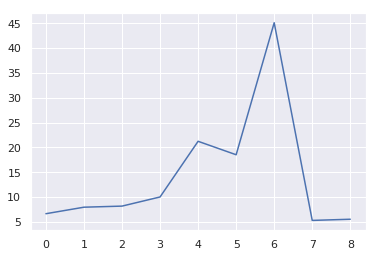

In [68]:
rmse_values = rmse_scores(posterior_predictions, data)
plt.plot(rmse_values)

In [72]:
rmse_values

[6.645664010182864,
 7.958081594850591,
 8.177276283179145,
 10.017899511709178,
 21.233809347372055,
 18.523127895416927,
 45.11918820650665,
 5.294591348506882,
 5.533647387211671]

In [28]:
final_model = pm.model_to_graphviz(model)

In [34]:
final_model.save(directory="./final_model.png")

'./final_model.png/./final_model.png'

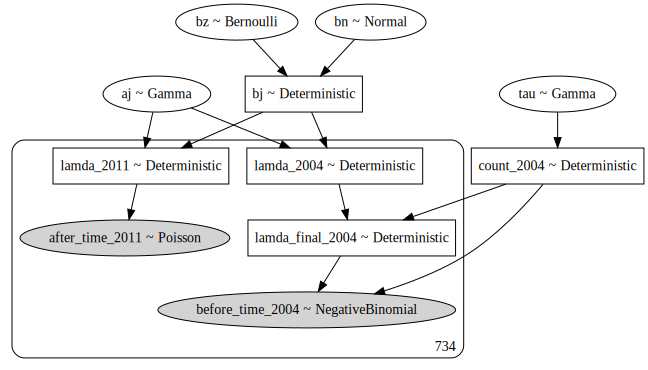

In [395]:
pm.model_to_graphviz(model)